<img src="https://i.imgur.com/6U6q5jQ.png"/>

<a target="_blank" href="https://colab.research.google.com/github/SocialAnalytics-StrategicIntelligence/introTextData/blob/main/index.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Text as Data

Let me get use some old tweets from Donald Trump:

In [1]:
import pandas as pd
import os

trumpFile=os.path.join('textData','trumps.csv')
allTweets=pd.read_csv(trumpFile)
allTweets

,created_at,text,is_retweet,favorite_count,retweet_count,Hour,Day,Date
0,2020-08-13 23:26:50,.@DonYoungAK really produces for Alaska. He is...,False,18714,5305,23,5,2020-08-13
1,2020-08-13 23:23:26,"...She will be a great Senator, and has my Com...",False,14946,3490,23,5,2020-08-13
2,2020-08-13 23:23:25,.@CynthiaMLummis is a friend of mine and a gre...,False,32586,8584,23,5,2020-08-13
3,2020-08-13 21:27:36,LIVE: President @realDonaldTrump holds a news ...,True,0,5917,21,5,2020-08-13
4,2020-08-13 18:59:29,https://t.co/ymvtIzQqoR,False,20131,5303,18,5,2020-08-13
...,...,...,...,...,...,...,...,...
194,2020-08-04 23:00:40,Reopening Our Schools: @realDonaldTrump says s...,True,0,7205,23,3,2020-08-04
195,2020-08-04 23:00:38,Reopening America: President @realDonaldTrump ...,True,0,7603,23,3,2020-08-04
196,2020-08-04 23:00:15,We have far and away the most robust testing c...,True,0,5717,23,3,2020-08-04
197,2020-08-04 22:48:35,"""As we shelter those at high risk, we are also...",True,0,5414,22,3,2020-08-04


Let me subset the dataframe, just to keep the non retweets:

In [2]:
DTtweets=allTweets[~allTweets.is_retweet]
DTtweets.reset_index(drop=True,inplace=True)

## Tokenization

A key step for text analytics is tokenization: where the text is broken into smaller pieces.

We can use:

- NLTK library:

In [7]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Charles\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [8]:
import nltk
from nltk.tokenize import word_tokenize

DTtweets['text'].apply(nltk.word_tokenize)

0      [., @, DonYoungAK, really, produces, for, Alas...
1      [..., She, will, be, a, great, Senator, ,, and...
2      [., @, CynthiaMLummis, is, a, friend, of, mine...
3                          [https, :, //t.co/ymvtIzQqoR]
4                          [https, :, //t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn, ’, t, int...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                        [https, :, //t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

* Pandas string functions:

In [9]:
DTtweets.text.str.split('\s')

0      [.@DonYoungAK, really, produces, for, Alaska.,...
1      [...She, will, be, a, great, Senator,, and, ha...
2      [.@CynthiaMLummis, is, a, friend, of, mine, an...
3                              [https://t.co/ymvtIzQqoR]
4                              [https://t.co/BY6PrMRmqJ]
                             ...                        
116    [For, those, that, thought, I, wasn’t, into, t...
117    [A, great, race, run, by, Roger, against, a, v...
118    [There, is, TREMENDOUS, Lawlessness, in, Ameri...
119                            [https://t.co/JDS4zUXXJG]
120    [Great, meeting, today, with, the, CoronaVirus...
Name: text, Length: 121, dtype: object

The basic Pandas seems more convenient. Then, we simply create a series where each cell is a token (word):

In [10]:
import numpy as np

wordInSeries=pd.Series(np.concatenate(DTtweets.text.str.split('\s')))
wordInSeries

0                   .@DonYoungAK
1                         really
2                       produces
3                            for
4                        Alaska.
                  ...           
2915                        Stay
2916                    informed
2917                         at:
2918    https://t.co/p9j7kZsD7b.
2919     https://t.co/nnnUHCzOLV
Length: 2920, dtype: object

### Cleaning the tokens

In [11]:
wordInSeries=wordInSeries[~wordInSeries.str.startswith('http')].reset_index(drop=True)
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [12]:
wordInSeries=wordInSeries.str.replace('[^\x01-\x7F]','')
wordInSeries=wordInSeries.str.replace('&amp;','and')
wordInSeries=wordInSeries.str.replace('&lt;|&gt;','')
wordInSeries

0       .@DonYoungAK
1             really
2           produces
3                for
4            Alaska.
            ...     
2861            Oval
2862         Office.
2863            Stay
2864        informed
2865             at:
Length: 2866, dtype: object

In [13]:
# punctuation
import string
PUNCs=string.punctuation # '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
wordInSeries=wordInSeries.str.replace('['+PUNCs+']', '',regex=True)

# all to lower case
wordInSeries=wordInSeries.str.lower()
wordInSeries

0       donyoungak
1           really
2         produces
3              for
4           alaska
           ...    
2861          oval
2862        office
2863          stay
2864      informed
2865            at
Length: 2866, dtype: object

### Relevant tokens

It is difficult to know what tokens should not be analyzed. Let's count the current ones:

In [14]:
wordInSeries.value_counts()

the           136
and            91
to             79
in             67
of             58
             ... 
plague          1
cops            1
sleazebags      1
highest         1
informed        1
Name: count, Length: 1027, dtype: int64

We could agree that simple sintactic components like determinatives, conjunctions, or prepositions do carry much information. Most of these elements are known as **STOPWORDS**.  We use them to reduce our tokens:

In [16]:
 import nltk
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Charles\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:

from nltk.corpus import stopwords
STOPS = stopwords.words('english')


wordInSeries=wordInSeries[~wordInSeries.isin(STOPS)].reset_index(drop=True)
wordInSeries

0       donyoungak
1           really
2         produces
3           alaska
4       incredible
           ...    
1681         force
1682          oval
1683        office
1684          stay
1685      informed
Length: 1686, dtype: object

## Word Frequency

We could keep prepare a frequency with the words remaining:

In [18]:
wordInSeries.value_counts()

great       27
bus         20
people      18
usdot       17
big         15
            ..
men          1
women        1
fighting     1
plague       1
informed     1
Name: count, Length: 927, dtype: int64

Let's see the distribution of counts:

<Axes: ylabel='Frequency'>

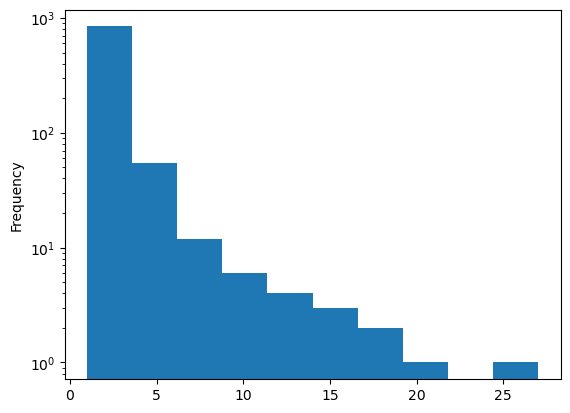

In [19]:
wordInSeries.value_counts().plot(logy=True, kind='hist')

In [20]:
FrequencyTrumpTokens=wordInSeries.value_counts()[wordInSeries.value_counts()>5]
FrequencyTrumpTokens

great              27
bus                20
people             18
usdot              17
big                15
service            14
infrastructure     14
support            13
state              12
complete           12
news               12
federal            11
endorsement        11
total              10
funds              10
joe                10
congratulations     9
                    8
biden               8
thank               8
improvements        8
happy               7
president           7
fake                7
good                7
new                 7
states              7
second              7
first               7
way                 6
vets                6
funding             6
would               6
amendment           6
one                 6
win                 6
strong              6
congressman         6
Name: count, dtype: int64

We have series, let me have a dict:

In [21]:
FrequencyTrumpTokens.to_dict()

{'great': 27,
 'bus': 20,
 'people': 18,
 'usdot': 17,
 'big': 15,
 'service': 14,
 'infrastructure': 14,
 'support': 13,
 'state': 12,
 'complete': 12,
 'news': 12,
 'federal': 11,
 'endorsement': 11,
 'total': 10,
 'funds': 10,
 'joe': 10,
 'congratulations': 9,
 '': 8,
 'biden': 8,
 'thank': 8,
 'improvements': 8,
 'happy': 7,
 'president': 7,
 'fake': 7,
 'good': 7,
 'new': 7,
 'states': 7,
 'second': 7,
 'first': 7,
 'way': 6,
 'vets': 6,
 'funding': 6,
 'would': 6,
 'amendment': 6,
 'one': 6,
 'win': 6,
 'strong': 6,
 'congressman': 6}

### Plotting

In [23]:
pip install wordcloud 

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/300.2 kB 459.5 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


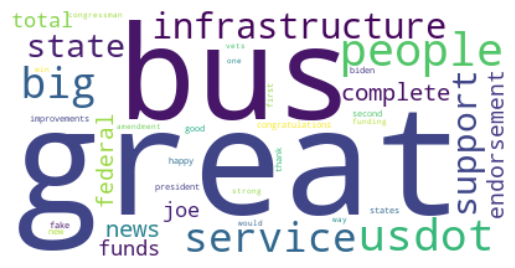

In [24]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc1 = WordCloud(background_color='white')
wc1.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc1, interpolation="bilinear")
plt.axis("off")
plt.show()



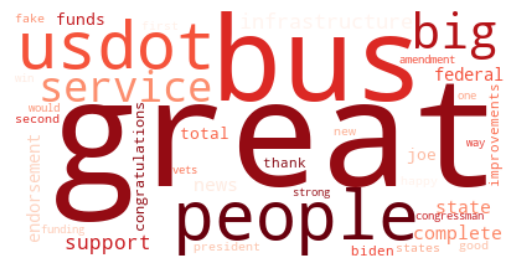

In [25]:

wc2 = WordCloud(background_color='white',
                colormap="Reds")
wc2.generate_from_frequencies(frequencies=FrequencyTrumpTokens.to_dict())
plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()


## Bigrams

We can do the same with pairs of words (bigrams). Let me open a text file:

In [32]:
f = open("textData/textpr.txt", "r")

textFile=os.path.join('textData','textpr.txt')
allText=pd.read_table(textFile,header=None)

# see the text
allText

FileNotFoundError: [Errno 2] No such file or directory: 'textData/textpr.txt'

Let's normalize the text to lowercase:

In [ ]:
allText[0]=allText[0].str.lower()
allText[0]=allText[0].str.replace('['+PUNCs+']', '',regex=True)

Let me create the bigrams:

In [ ]:
from nltk import bigrams

theBigrams=[bigrams(eachTW.split()) for eachTW in allText[0]]


# list of all bigrams
from itertools import chain

pairWords = list(chain(*theBigrams))

pairWords

I will also use the **stopwords** here. I will get rid of any pair of words that include at least one of the **stopwords**:

In [ ]:
pairWords_clean = [gram for gram in pairWords if not any(stop in gram for stop in STOPS)]
print(pairWords_clean)

At this stage, let me create a frequency table of the bigrams:

In [ ]:
from collections import Counter

bigramsCount_dict = Counter(pairWords_clean) #generate counter

# Turn bigramsCount_dict  into dataframe, naming columns
bigramsCount = pd.DataFrame(bigramsCount_dict.most_common(),
                        columns=['theBigram', 'weight'])
bigramsCount

I need to create two columns from the tuples:

In [ ]:
bigramsCount['word1'], bigramsCount['word2'] =zip(*bigramsCount['theBigram'])
bigramsCount

I will use those columns with networkx:

In [ ]:
import networkx as nx

G_bigram=nx.from_pandas_edgelist(df=bigramsCount, source='word1',target= 'word2',edge_attr= ["weight"])

In [ ]:

# plotting graph (default layout)
nx.draw_networkx(G_bigram)

I should subset:

In [ ]:
#subsetting
bigramsCount_wgte_3=bigramsCount[bigramsCount['weight']>=3]

G_bigram_wgte_3=nx.from_pandas_edgelist(df=bigramsCount_wgte_3, source='word1',target= 'word2',edge_attr= ["weight"])

In [ ]:

#plotting
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3)

# Plot networks
nx.draw_networkx(G_bigram_wgte_3, pos,
                 edge_color='red',node_color='yellow',
                 node_size=100,with_labels = False,ax=ax)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
pos = nx.spring_layout(G_bigram_wgte_3, weight='weight',k=0.6)
nx.draw_networkx(G_bigram_wgte_3, pos)

# labels away from node
for word, freq in pos.items():
    x, y = freq[0]+.05, freq[1]+.03
    ax.text(x, y,s=word,horizontalalignment='center',
            fontsize=13,rotation=30)

for edge in G_bigram_wgte_3.edges(data='weight'):
    nx.draw_networkx_edges(G_bigram_wgte_3, pos, edgelist=[edge], width=2*edge[2])




<div class="alert-success">

<strong>Exercise</strong>
    
1. Create a GitHub repo.
2. Create a notebook in python, and do a wordcloud with a text in English. Use a file in txt.
3. Create a notebook in python, and do a bigram the previous txt file.
4. Publish the result as a webpage using GitHub
    
</div>

<div class="alert alert-danger">
  <strong>CHALLENGE!</strong>
   <br> * Use the function [n-grams](https://tedboy.github.io/nlps/generated/generated/nltk.ngrams.html) from NLTK, for 3-grams and 4-grams. Use a text in Spanish.
</div>